<h1 style="color:Blue; font-size:40px;">Data Wranglind and Analysis</h1>

Your first task is to **import, comprehend, and preprocess** the dataset. This will
then enable you to identify key aspects of the cities under study and create
compelling visualizations. Moreover, you should be able to answer the following
questions:

## **Group Members**

- Diogo Gonçalves - 20241817
- Gustavo Franco - 20241816
- João Marques - 20241771
- Juan Mendes - 20241804

## **Questions**

**1. Question 1**  
   How did you handle missing values and duplicate records in the dataset?  
   Justify your approach.

**2. Question 2**  
   a) Which country appears most frequently in the dataset? How many cities are associated with it?  
   b) How many cities are present in total? How many are associated with Greece?  
   c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

**3. Question 3**  
   a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?  
   b) How many days ago was the last update? On what day, month, and year did it occur?

**4. Question 4**  
   a) How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest?  
      Provide a visual representation.  
   b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living?  
      What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations.  
   c) Which is the best city for someone seeking:  
      - an average monthly salary above €2000  
      - a cost of living below or equal to €1600  
      - the lowest unemployment rate possible?

**5. Question 5**  
   What are three additional insights you find meaningful when comparing the given cities?


## **Import of libraries**

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Import of our dataset**

In [206]:
data = pd.read_csv("city_data.csv", sep = "|", header = 1, index_col = 0)
data.head()

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


## **Usefull information about or dataset**

In [36]:
data.dtypes

Population Density                 float64
Population                           int64
Working Age Population             float64
Youth Dependency Ratio             float64
Unemployment Rate                  float64
GDP per Capita                     float64
Days of very strong heat stress      int64
Main Spoken Languages               object
Average Monthly Salary               int64
Avgerage Rent Price                  int64
Average Cost of Living               int64
Average Price Groceries            float64
Last Data Update                    object
dtype: object

- int64 and float64 necessary?
- Main Spoken Languages : Categorical
- Last Data Update : Date

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, Vienna, Austria to Adana, Turkiye
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population Density               85 non-null     float64
 1   Population                       86 non-null     int64  
 2   Working Age Population           85 non-null     float64
 3   Youth Dependency Ratio           86 non-null     float64
 4   Unemployment Rate                85 non-null     float64
 5   GDP per Capita                   85 non-null     float64
 6   Days of very strong heat stress  86 non-null     int64  
 7   Main Spoken Languages            85 non-null     object 
 8   Average Monthly Salary           86 non-null     int64  
 9   Avgerage Rent Price              86 non-null     int64  
 10  Average Cost of Living           86 non-null     int64  
 11  Average Price Groceries          6 non-null      float64
 12  Las

In [39]:
data.describe()

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries
count,85.000000,8.600000e+01,8.500000e+01,86.000000,85.000000,85.000000,86.000000,86.000000,86.000000,86.000000,6.000000
mean,1115.141176,1.754370e+06,1.158294e+06,24.096860,6.667059,51750.269647,4.348837,2434.488372,1070.104651,1808.383721,225.833333
std,2542.778533,1.843133e+06,1.232534e+06,3.266421,4.553632,21495.617843,10.038476,1188.602984,498.964576,727.999680,97.890585
min,65.000000,7.389500e+04,4.635900e+04,19.300000,1.400000,10089.920000,0.000000,750.000000,100.000000,800.000000,100.000000
25%,304.000000,5.281185e+05,3.580200e+05,21.425000,3.700000,38664.000000,0.000000,1412.500000,800.000000,1300.000000,147.500000
50%,548.000000,1.178397e+06,7.337940e+05,23.150000,5.300000,49329.000000,1.000000,2400.000000,1050.000000,1665.000000,243.000000
75%,1020.000000,2.315896e+06,1.534225e+06,25.925000,8.100000,63083.000000,3.000000,3200.000000,1250.000000,2100.000000,295.750000
max,20983.000000,1.239654e+07,8.274794e+06,37.800000,23.000000,146094.000000,59.000000,6636.000000,3190.000000,4862.000000,340.000000


In [40]:
data.shape

(86, 13)

In [41]:
data.columns

Index(['Population Density', 'Population', 'Working Age Population ',
       'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Average Price Groceries',
       'Last Data Update'],
      dtype='object')

### Transform "Last Data Update" into data time 

In [43]:
data["Last Data Update"] = pd.to_datetime(data["Last Data Update"])

##
## **Question 1**
## How did you handle missing values and duplicate records in the dataset?
## Justify your approach.
##

### Missing values

In [46]:
import pandas as pd

# Check number of missing values per column
print(data.isnull().sum())

# Check total number of missing values in the entire DataFrame
print(data.isnull().sum().sum())

Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Avgerage Rent Price                 0
Average Cost of Living              0
Average Price Groceries            80
Last Data Update                    0
dtype: int64
85


- Probably drop Average Price Groceries


### Input manual dos missing values

#
#### - Population Density

In [50]:
data[data['Population Density'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Valencia, Spain",NaN,1748142,1162828.0,22.6,13.7,33570.0,5,Spanish;Valencian,2400,1190,1300,NaN,2023-06-04


In [51]:
data.loc[ "Valencia, Spain", "Population Density"] = 5800

#
#### - Working Age Population 

In [53]:
data[data['Working Age Population '].isnull()] # Tem aqui um espaço no nome (final)

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Dusseldorf, Germany",1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,NaN,2024-01-15


In [54]:
data.loc[ "Dusseldorf, Germany", "Working Age Population "] = 612178

#
#### - Unemployment Rate 

In [56]:
data[data['Unemployment Rate'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17


In [57]:
data.loc[ "Gent, Belgium", "Unemployment Rate"] = 6.1

#
#### - GDP per Capita

In [177]:
data[data['GDP per Capita'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
Lemesos;Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,NaN,2023-08-14 00:00:00


In [60]:
data.loc[ "Lemesos;Cyprus", "GDP per Capita"] = 29080.00

#
#### - Main Spoken Languages

In [62]:
data[data['Main Spoken Languages'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Dusseldorf, Germany",1295.0,1554077,612178.0,21.4,3.3,71238.0,3,NaN,3200,1100,2050,NaN,2024-01-15


In [63]:
data.loc[ "Dusseldorf, Germany", "Main Spoken Languages"] = "English, Turkish, Italian, Greek, Japanese"

### Duplicates

In [65]:
# Check number of duplicate rows
print(data.duplicated().sum())

# Show duplicate rows
print(data[data.duplicated()])

# Remove duplicate rows
data = data.drop_duplicates()

2
                 Population Density  Population  Working Age Population   \
City                                                                       
Berlin. Germany               304.0     5303922                3481212.0   
Malaga, Spain                 571.0      869096                 585608.0   

                 Youth Dependency Ratio  Unemployment Rate  GDP per Capita  \
City                                                                         
Berlin. Germany                    21.3                4.7         46548.0   
Malaga, Spain                      23.5               17.7         27694.0   

                 Days of very strong heat stress  \
City                                               
Berlin. Germany                                3   
Malaga, Spain                                  0   

                            Main Spoken Languages  Average Monthly Salary  \
City                                                                        
Berlin. Germany  

In [66]:
data.isnull().sum()

Population Density                  0
Population                          0
Working Age Population              0
Youth Dependency Ratio              0
Unemployment Rate                   0
GDP per Capita                      0
Days of very strong heat stress     0
Main Spoken Languages               0
Average Monthly Salary              0
Avgerage Rent Price                 0
Average Cost of Living              0
Average Price Groceries            78
Last Data Update                    0
dtype: int64

### Justify

In [68]:
### Answer

##
## **Question 2**
## a) Which country appears most frequently in the dataset? How many cities are
## associated with it?
## b) How many cities are present in total? How many are associated with
## Greece?
## c) Which is the least spoken language in the dataset? Which are the top 3 most
## spoken languages?
##

### a)

In [71]:
# Which country appears most frequently in the dataset?
list_of_countrys = pd.Series([string.split(", ")[1] for string in data.index if ", " in string]).value_counts()
most_frequent_country = list_of_countrys.idxmax()
print(f"Which country appears most frequently in the dataset? : {most_frequent_country}")

number_of_cities_in_mfc = len([citie for citie in data.index if "Germany" in citie])
print(f"How many cities are associated with it? : {number_of_cities_in_mfc}")


Which country appears most frequently in the dataset? : Germany
How many cities are associated with it? : 10


### b)

In [73]:
number_of_cities = len([string.split(", ")[0] for string in data.index if ", " in string])
print(f"How many cities are present in total? : {number_of_cities}")

number_of_cities_in_Greece = len([citie for citie in data.index if "Greece" in citie])
print(f"How many are associated with Greece? : {number_of_cities_in_Greece}")

How many cities are present in total? : 82
How many are associated with Greece? : 2


### c)

In [75]:
list_of_languages = pd.Series([dooble for string in data["Main Spoken Languages"] for dooble in string.split(", ")]).value_counts()
least_frequent_language = list_of_languages.idxmin()
print(f"Which is the least spoken language in the dataset? : {least_frequent_language}")
top_3_languages = ", ".join(list_of_languages.head(3).index)
print(f"Which are the top 3 most spoken languages? : {top_3_languages}")

Which is the least spoken language in the dataset? : Luxembourgish
Which are the top 3 most spoken languages? : English, German, Turkish


##
## **Question 3**
## a) Entries uploaded before April 2023 need to be updated. Which cities would
## require an update?
## b) How many days ago was the last update? On what day, month, and year did
## it occur?
##

### a)

In [78]:
list_of_cities = ", ".join([string.split(", ")[0] for string in data.index if (data.loc[string,"Last Data Update"]).year < 2023 or ((data.loc[string,"Last Data Update"]).year == 2023 and (data.loc[string,"Last Data Update"]).month < 4)])
print(f"Entries uploaded before April 2023 need to be updated. Which cities would require an update? : {list_of_cities}")

Entries uploaded before April 2023 need to be updated. Which cities would require an update? : Basel, Munich, Frankfurt am Main, Lyon, Venice, Gothenburg


### b)

In [80]:
biggest_year_country = data["Last Data Update"].dt.year.idxmax()
last_update = data.loc[biggest_year_country, "Last Data Update"]
time_difference = (pd.Timestamp.today() - last_update).days
print(f"How many days ago was the last update? : {time_difference}")
print(f"On what day, month, and year did it occur? : {last_update.day}-{last_update.month}-{last_update.year}")

How many days ago was the last update? : 520
On what day, month, and year did it occur? : 15-6-2024


##
## **Question 4**
## a) How are the Unemployment Rate and GDP per Capita distributed and
## related? What does this relationship suggest?
## Provide a **visual representation**.
##
## b) Which are the top 5 cities with the largest difference between the Average
## Monthly Salary and Average Cost of Living?
## What about the top 5 countries with the smallest average difference?
## Show these results with **meaningful visualizations**.
##
## c) Which is the best city for someone seeking:
## an average monthly salary above €2000,
## a cost of living below or equal to €1600, and
## the lowest unemployment rate possible?

### a)

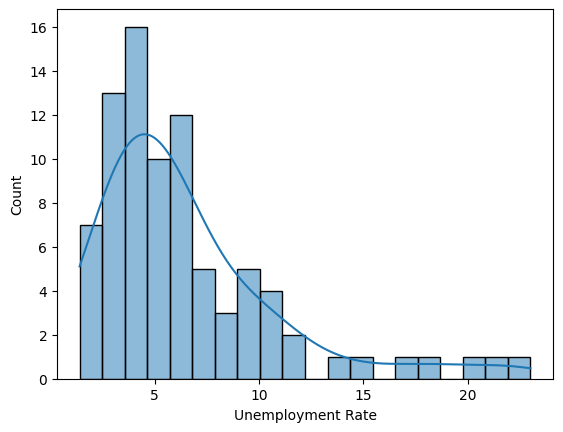

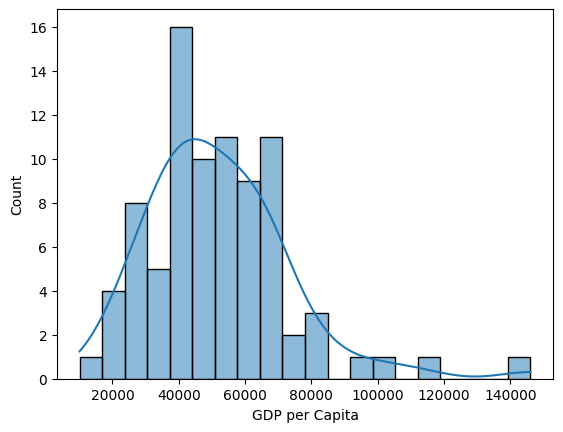

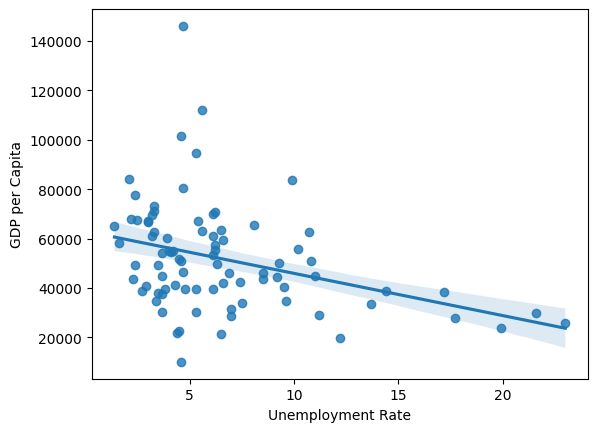

Correlation between Unemployment Rate and GDP per Capita : -0.349053752111238


In [83]:
# How are the Unemployment Rate and GDP per Capita distributed and related?

# Distribution
sns.histplot(data["Unemployment Rate"], bins=20, kde=True)
plt.show()
sns.histplot(data["GDP per Capita"], bins=20, kde=True)
plt.show()

#Relation
sns.regplot(data=data, x="Unemployment Rate", y="GDP per Capita")
plt.show()
correlation = data["Unemployment Rate"].corr(data["GDP per Capita"])
print("Correlation between Unemployment Rate and GDP per Capita :", correlation)

# What does this relationship suggest?

# Missing answer

### b) 

Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? : Basel, Switzerland, Tampere, Finland, Helsinki, Finland, Zurich, Switzerland, Geneva, Switzerland
What about the top 5 countries with the smallest average difference? : Lisbon, Portugal, Porto, Portugal, Greece, Athens, Thessaloniki, Greece, Venice, Italy


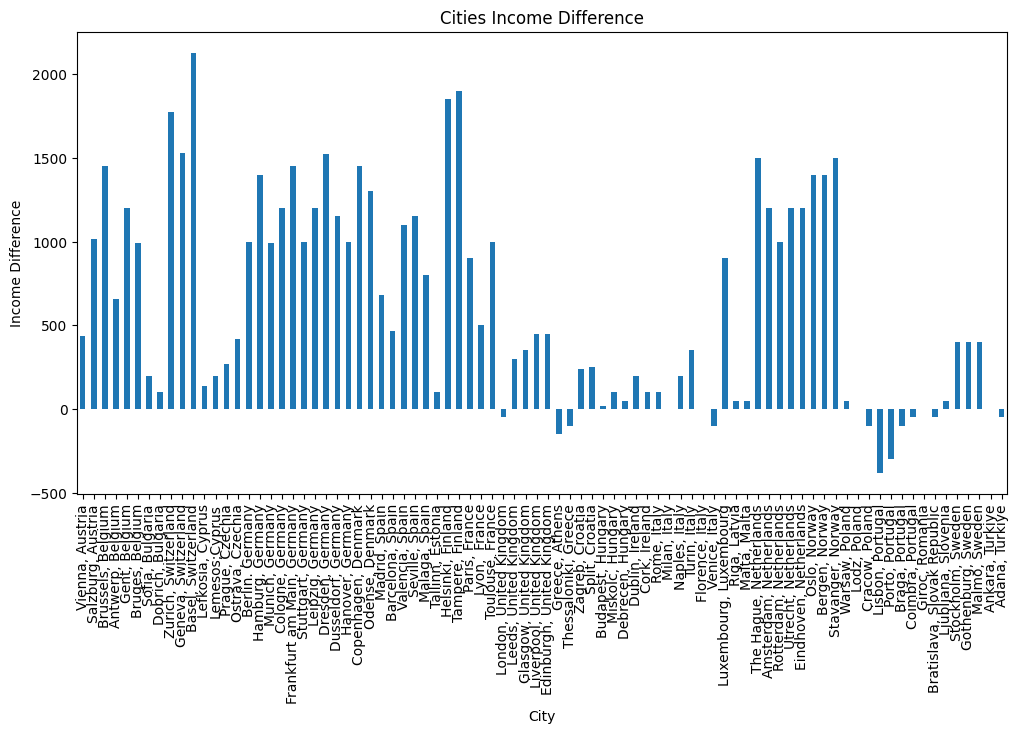

In [85]:
difference = pd.Series([(data.loc[city,"Average Monthly Salary"]- data.loc[city, "Average Cost of Living"]) for city in data.index], index=data.index, name = "Income")
high_difference = difference.sort_values(ascending = False)
low_difference = difference.sort_values(ascending = True)
print(f"Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? : {", ".join(high_difference.head().index.tolist())}")
print(f"What about the top 5 countries with the smallest average difference? : {", ".join(low_difference.head().index.tolist())}") 

# Melhorar respostas 

# Graph
plt.figure(figsize=(12,6))
difference.plot(kind="bar")
plt.title("Cities Income Difference")
plt.ylabel("Income Difference")
plt.xlabel("City")
plt.show()

### c)

In [87]:
#c) Which is the best city for someone seeking: an average monthly salary above €2000, a cost of living below or equal to €1600, and the lowest unemployment rate possible?
best_city = data[(data["Average Monthly Salary"] > 2000) & (data["Average Cost of Living"] < 1600)]["Unemployment Rate"].idxmin()
print(f"Which is the best city for someone seeking: an average monthly salary above €2000, a cost of living below or equal to €1600, and the lowest unemployment rate possible? : {best_city}")

Which is the best city for someone seeking: an average monthly salary above €2000, a cost of living below or equal to €1600, and the lowest unemployment rate possible? : Dresden, Germany


##
## **Question 5**
## What are **three additional insights** you find meaningful when comparing the
## given cities?

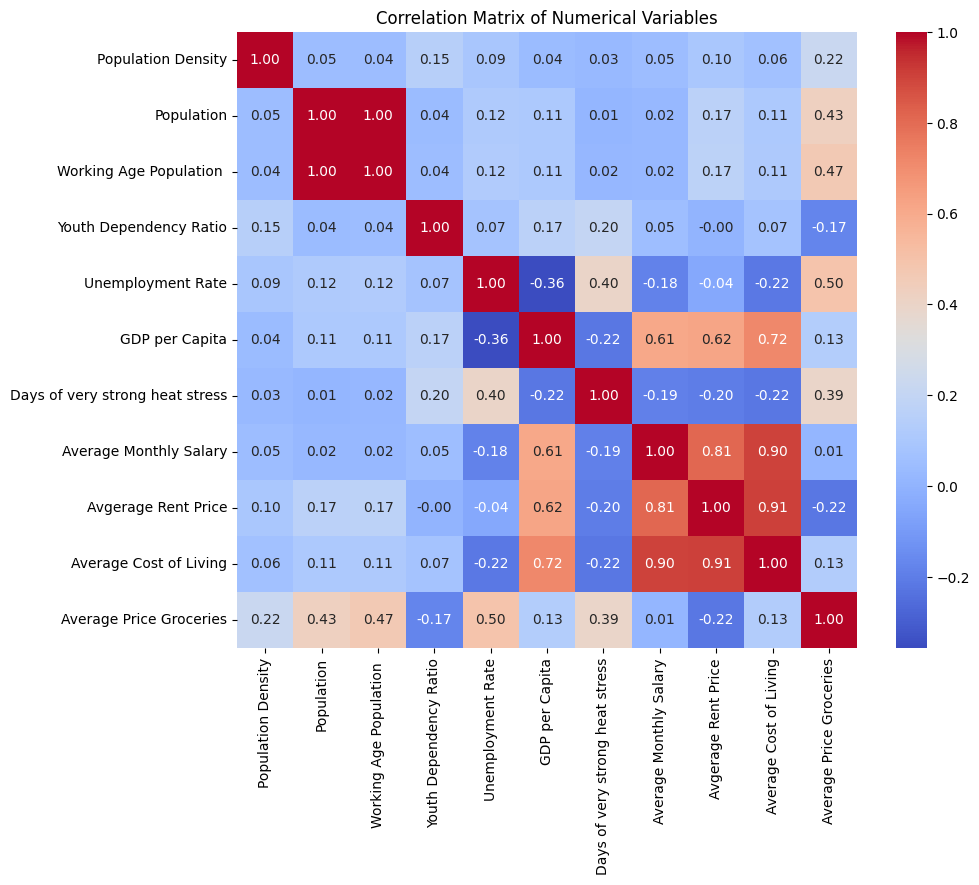

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include="number")

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Falta a resposta
# - Relação entre Average Monthly Salary e Average Rent Price
# - Relação entre Average Monthly Salary e Average Cost of Living
# - Relação entre Average Rent Price e Average Cost of Living